In [2]:
import pandas as pd
import matplotlib.pyplot as plt 


file_name = 'belgium_information.csv' 
bel_info = pd.read_csv(file_name)
bel_info.tail()

,Years,population,gdp per capita,Carbon intensity of fossil energy,primary intensity,nuclear consumption,renewable consumption,fossil consumption
34,2014,11159407,47912.767751,1.009452,0.000906,2.897936,0.770421,39.729449
35,2015,11209057,41230.023127,1.007713,0.001089,2.244454,0.863715,41.781945
36,2016,11274196,42225.346541,1.010970,0.001102,3.742304,0.861393,41.925691
37,2017,11331422,44390.236671,1.011111,0.001045,3.630868,0.962683,41.811288
38,2018,11375158,47714.598083,1.008636,0.000970,2.458899,1.098366,42.732485


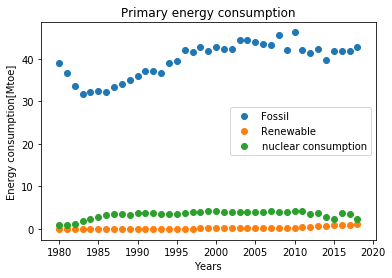

In [3]:
plt.scatter(
                x=bel_info['Years'],
                y=bel_info['fossil consumption'])

plt.scatter(
                x=bel_info['Years'],
                y=bel_info['renewable consumption'])
plt.scatter(
                x=bel_info['Years'],
                y=bel_info['nuclear consumption'])
plt.ylabel("Energy consumption[Mtoe]")
plt.xlabel("Years")
plt.title("Primary energy consumption")
plt.legend(('Fossil', 'Renewable', 'nuclear consumption'))
plt.show()

In [4]:
file_name = 'energy_emission_bel.csv' 
bel_emi = pd.read_csv(file_name)
bel_emi.tail()

,Years,CO2 gas,CO2 coal,CO2 oil,CO2 nuclear,CO2 wind,CO2 solar,CO2 hydro,CO2 fossil,CO2 renewable,CO2 primary
34,2014,27.885880,12.211840,43.961300,0.539248,0.055380,0.132618,0.067252,84.059020,0.255250,84.853518
35,2015,30.392254,12.295170,46.798093,0.417648,0.066888,0.140438,0.065228,89.485517,0.272554,90.175719
36,2016,31.329701,11.619851,45.686551,0.696368,0.065244,0.142232,0.068494,88.636103,0.275970,89.608441
37,2017,31.557916,11.398655,44.276616,0.675632,0.078132,0.151248,0.064262,87.233187,0.293642,88.202461
38,2018,32.437073,15.399153,43.661663,0.457552,0.089988,0.182712,0.059938,91.497890,0.332638,92.288080


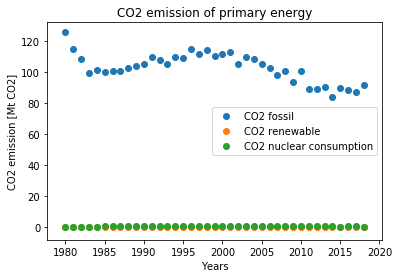

In [5]:
plt.scatter(
                x=bel_emi['Years'],
                y=bel_emi['CO2 fossil'])

plt.scatter(
                x=bel_emi['Years'],
                y=bel_emi['CO2 renewable'])
plt.scatter(
                x=bel_emi['Years'],
                y=bel_emi['CO2 nuclear'])

plt.ylabel("CO2 emission [Mt CO2]")
plt.xlabel("Years")
plt.title("CO2 emission of primary energy")
plt.legend(('CO2 fossil', 'CO2 renewable', 'CO2 nuclear consumption'))
plt.show()

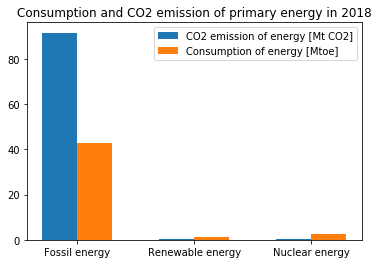

In [6]:
months = ['Fossil energy', 'Renewable energy', 'Nuclear energy']
plt.bar( months , [bel_emi['CO2 fossil'][38], bel_emi['CO2 renewable'][38], bel_emi['CO2 nuclear'][38]],width=-0.3, align='edge')

plt.bar(months , [bel_info['fossil consumption'][38], bel_info['renewable consumption'][38], bel_info['nuclear consumption'][38]], width=0.3, align='edge')


plt.title("Consumption and CO2 emission of primary energy in 2018")
plt.legend(("CO2 emission of energy [Mt CO2]", "Consumption of energy [Mtoe]"))
plt.show()

In [7]:
bel_info = bel_info.drop("Years", axis=1)

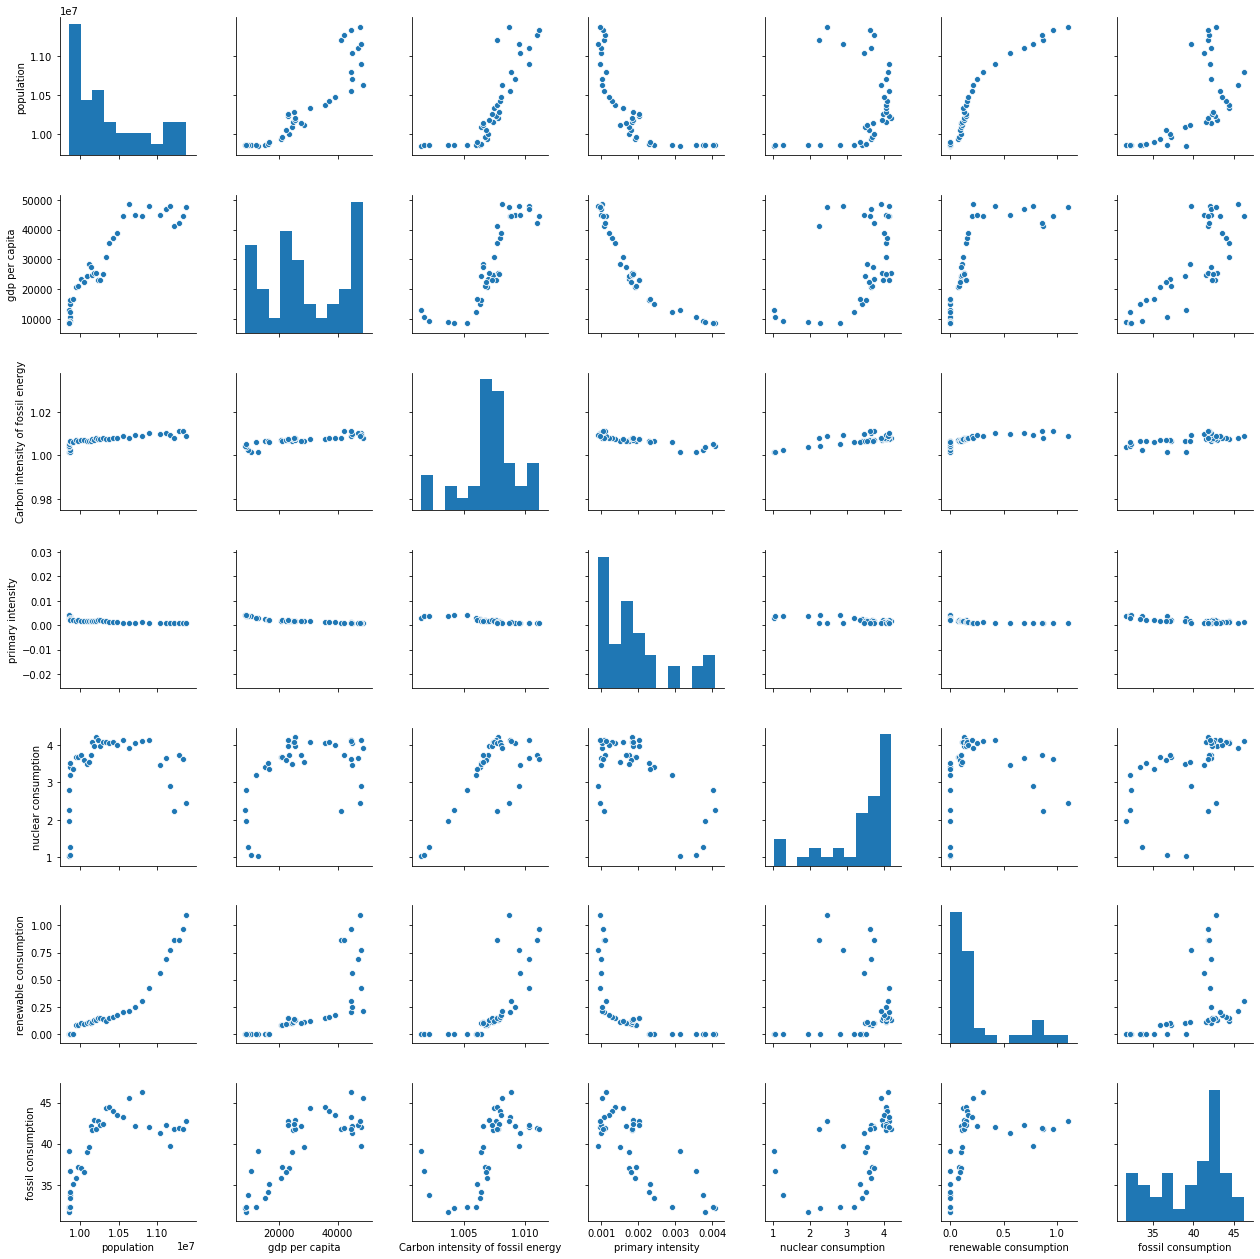

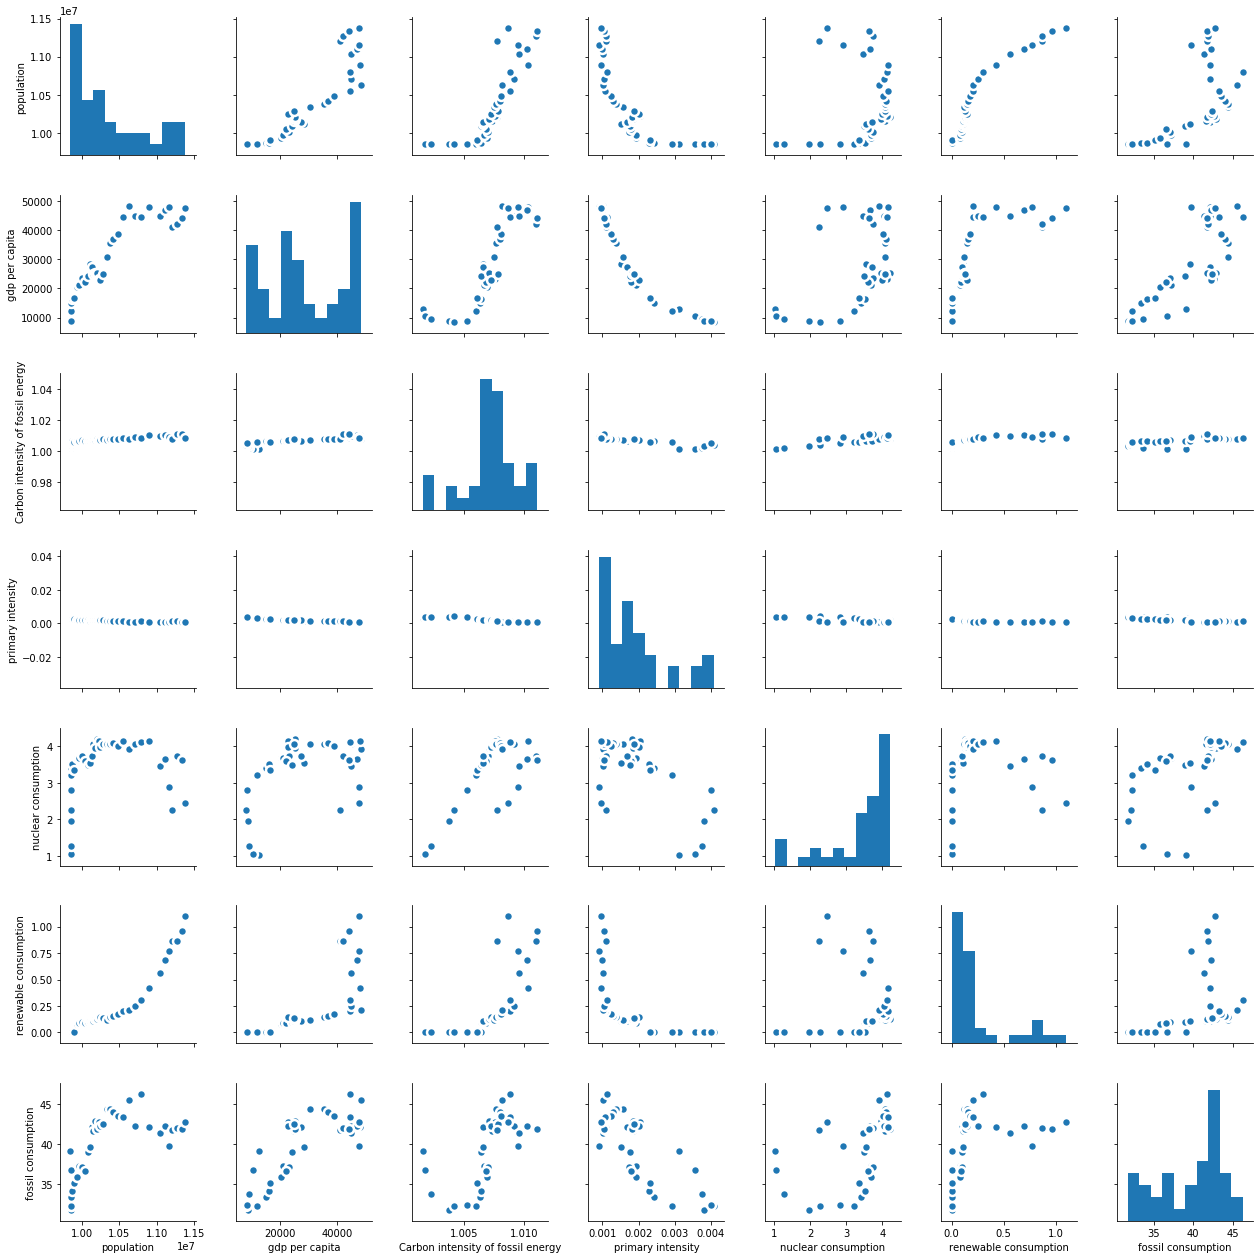

In [8]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
 
# left
sns.pairplot(bel_info, kind="scatter", palette="Set2")
plt.show()
 
# right: you can give other arguments with plot_kws.
sns.pairplot(bel_info, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()


In [125]:
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge


# Create linear regression object.
mlr= LinearRegression()


data = bel_info.values

x_train = data[0:30,1:6]
y_train = data[0:30,6:7]

x_test = data[34:39,1:6]
y_test = data[34:39,6:7]


# Fit linear regression.
mlr.fit(x_train, y_train)

# Get the slope and intercept of the line best fit.
print(mlr.intercept_)
# 
print(mlr.coef_)
#
predicted = mlr.predict(x_test)

[6592.48626916]
[[ 3.49978564e-04 -6.56509393e+03  1.07485955e+03  1.13566405e+01
   4.72093011e+01]]


In [126]:
y_test = np.resize(data[34:39,6:7], (1,len(predicted)))[0]
y_test = pd.Series(y_test)
predicted = np.resize(predicted, (1,len(predicted)))[0]
predict = pd.Series(predicted)

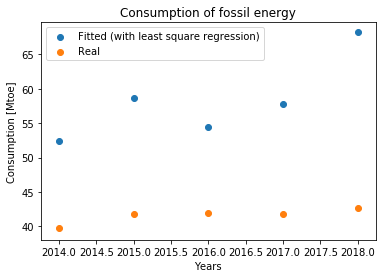

In [127]:
plt.scatter(
                x=bel_emi[34:39]['Years'],
                y=predicted)

plt.scatter(
                x=bel_emi[34:39]['Years'],
                y=y_test)


plt.ylabel("Consumption [Mtoe]")
plt.xlabel("Years")
plt.title("Consumption of fossil energy")
plt.legend(("Fitted (with least square regression)", "Real"))
plt.show()

The slope of the correlation for linear regression (least square):
4.23801070629578


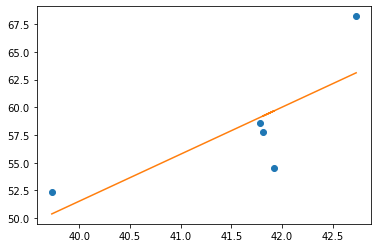

In [128]:
plt.plot(y_test, predicted, 'o')

m, b = np.polyfit(y_test, predicted, 1)
print("The slope of the correlation for linear regression (least square):")
print(m)
line = list()
for i in y_test:
    line.append(i*m + b)

plt.plot(y_test, line)

### Test of other linear regression methods ###

In [189]:
# Create linear regression object.
blr= BayesianRidge(n_iter=300, lambda_1 = 900)

x_train = data[0:29,1:6]
y_train = data[0:29,6:7]

x_test = data[29:39,1:6]
y_test = data[29:39,6:7]

y_train = np.ravel(y_train)
# Fit linear regression.
blr.fit(x_train, y_train)

# Get the slope and intercept of the line best fit.
print(blr.intercept_)
# 
print(blr.coef_)
#
predicted = blr.predict(x_test)

35.43729301468446
[ 1.48250172e-04  1.82236483e-11 -1.17994342e-11  9.27715891e-09
  1.10712337e-09]


In [187]:
y_test = np.resize(data[29:39,6:7], (1,len(predicted)))[0]
y_test = pd.Series(y_test)
predicted = np.resize(predicted, (1,len(predicted)))[0]
predict = pd.Series(predicted)

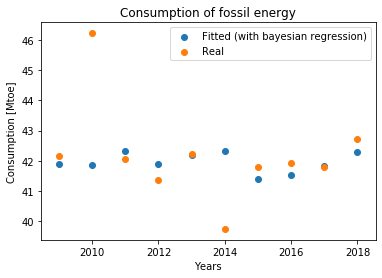

In [188]:
plt.scatter(
                x=bel_emi[29:39]['Years'],
                y=predicted)

plt.scatter(
                x=bel_emi[29:39]['Years'],
                y=y_test)


plt.ylabel("Consumption [Mtoe]")
plt.xlabel("Years")
plt.title("Consumption of fossil energy")
plt.legend(("Fitted (with bayesian regression)", "Real"))
plt.show()

The slope of the correlation for bayesian linear regression:
-0.033133847650794294


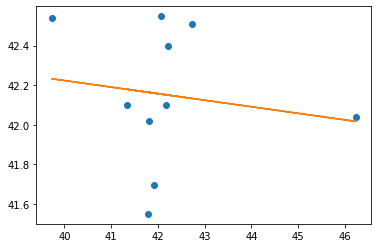

In [185]:
plt.plot(y_test, predicted, 'o')

m, b = np.polyfit(y_test, predicted, 1)
print("The slope of the correlation for bayesian linear regression:")
print(m)
line = list()
for i in y_test:
    line.append(i*m + b)

plt.plot(y_test, line)